# **Identificação**:

- `Número de aluno`: 222203209
- `Nome`: Francisco Gomes
- `Data`:03/06/2025

# **Instruções:**
- Justifique suas respostas quando solicitado.
- Não é permitido a consulta a outros alunos ou a qualquer material externo.
- Eletronic devices estão proibidos durante o teste.
- Teste seus códigos com diferentes entradas para garantir seu funcionamento.
- Salve o notebook com seu `número de aluno` antes de entregar. Exemplo: `2022000000.ipynb`.
- Faça silêncio em respeito aos alunos que ainda estão realizando o teste.

## Importando bibliotecas

In [1]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.3 umap umap-learn

In [2]:
!pip install nltk
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install scikit-learn

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.2.6 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
jax 0.5.2 requires scipy>=1

In [3]:
!pip install pandas networkx matplotlib

In [4]:
!pip install pyLDAvis

In [5]:
# Instalar o Graphviz e PyGraphviz
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [6]:
import numpy as np
import networkx as nx

# **Questões:**

## 1. Considerando o grafo abaixo:

In [7]:
# graph
g = {'S': {('A',7),('B',2),('C',3)},
    'A': {('B',3),('D',4),('S',7)},
    'B': {('A',3),('D',4),('H',1),('S',2)},
    'C': {('L',2),('S',3)},
    'D': {('A',4),('B',4),('F',5)},
    'E': {('K',5),('G',2)},
    'F': {('D',5),('H',4)},
    'G': {('H',2),('E',2)},
    'H': {('B',1),('F',4),('G',2)},
    'I':{('L',4),('J',6),('K',4)},
    'J':{('L',4),('I',6),('K',4)},
    'K':{('I',4),('J',4),('E',5)},
    'L':{('C',2),('J',4),('I',4)}
}

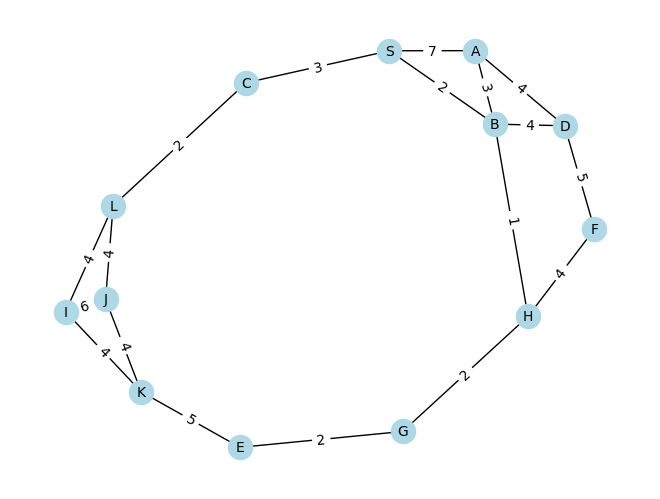

In [24]:
import matplotlib.pyplot as plt

def show_weighted_graph(graph):
    """
    Function to visualize the graph using NetworkX and Matplotlib.
    Enters a graph represented as an adjacency list and displays it.
    The graph is displayed with nodes, edges, and weights.

    Expected format for the graph:
    {
        'Node1': {('Node2', weight), ('Node3', weight)},
        'Node2': {('Node1', weight), ('Node4', weight)},
        ...
        'NodeN': {('NodeM', weight), ...}
    }

        Args:
            graph (dict): The graph represented as an adjacency list.
    """

    G = nx.Graph()
    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

show_weighted_graph(g)

## 1.2. Qual ou quais dos algoritmos abaixo eu poderia utilizar para encontrar o caminho com menor custo no grafo acima?

- a) [ ] Breadth-First Search (BFS)
- b) [ ] Depth-First Search (DFS)
- c) [ ] Dijkstra
- d) [ ] Minimax

In [9]:
# sua resposta
A opção C

## 1.3. Explique sua escolha(s) na questão anterior:

In [10]:
O Dijkstra é um algoritmo para encontrar o caminho com menor custo num grafo ponderado, desde que os pesos sejam positivos.

## 1.4. Partindo do nó inicial "S" (`start_node = 'S'`) e tendo como objetivo chegar ao nó "E" (`goal_node = 'E'`), qual o caminho e menor custo possível?

In [11]:
# start node
start_node = 'S'

# goal node
goal_node = 'E'

In [25]:
# sua resposta
import networkx as nx


G = nx.Graph()

for origem, destinos in g.items():
    for destino, peso in destinos:
        G.add_edge(origem, destino, weight=peso)

caminho_mais_curto = nx.dijkstra_path(G, start_node, goal_node)
custo_total = nx.dijkstra_path_length(G, start_node, goal_node)

# Exibir os resultados
print(f"Caminho mais curto de '{start_node}' até '{goal_node}': {caminho_mais_curto}")
print(f"Custo total: {custo_total}")


Caminho mais curto de 'S' até 'E': ['S', 'B', 'H', 'G', 'E']
Custo total: 7


## 2. Considerando o grafo abaixo, escolha um dos algoritmos da lista abaixo e encontre o nó desejado:

- Breadth-First Search (BFS)
- Depth-First Search (DFS)
- Dijkstra
- Minimax

**A solução deve conter o caminho utilizado**
- Exemplo:
    - para `nó inicial A` e `nó objetivo H`:
    - Caminho: ACDBFGDGH



In [28]:
grafo = {
    'A': {'B': 1, 'C': 1},
    'B': {'A': 1, 'D': 1, 'E': 1},
    'C': {'A': 1, 'F': 1, 'G': 1},
    'D': {'B': 1},
    'E': {'B': 1, 'H': 1},
    'F': {'C': 1},
    'G': {'C': 1, 'H': 1},
    'H': {'E': 1, 'G': 1}
}


**A funçao abaixo pode auxiliar na visualização de seu grafo...**

In [40]:
def show_graph(graph):
    """
    Function to visualize the graph using NetworkX and Matplotlib.
    Enters a graph represented as an adjacency list and displays it.
    The graph is displayed with nodes and edges.

    Args:
        graph (dict): The graph represented as an adjacency list.
    """
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10)
    plt.show()


## 2.1. `Nó inicial A` e `nó objetivo H`

In [39]:
def dfs_completo(grafo, inicio, objetivo):
    pilha = [(inicio, [inicio])]
    visitados = []
    caminho_ate_objetivo = None

    while pilha:
        (no_atual, caminho) = pilha.pop()
        if no_atual not in visitados:
            visitados.append(no_atual)
            if no_atual == objetivo and caminho_ate_objetivo is None:
                caminho_ate_objetivo = caminho
            for vizinho in grafo[no_atual]:
                if vizinho not in visitados:
                    pilha.append((vizinho, caminho + [vizinho]))

    return caminho_ate_objetivo, visitados

# Definir início e objetivo
start_node = 'A'
goal_node = 'H'

# Executar DFS
caminho_encontrado, ordem_visita = dfs_completo(grafo, start_node, goal_node)

# Exibir o resultado
print(f"Caminho encontrado de '{start_node}' até '{goal_node}' usando DFS: {' -> '.join(caminho_encontrado)}")
print(f"Ordem completa de visitação: {', '.join(ordem_visita)}")

Caminho encontrado de 'A' até 'H' usando DFS: A -> C -> F -> I -> K -> L -> J -> H
Ordem completa de visitação: A, C, F, I, K, L, J, H, E, B, D, G


## 2.2. `Nó inicial A` e `nó objetivo F`

In [16]:
# sua resposta

## 2.3. Qual estrutura de dados o algoritmo que você escolheu tipicamente usa?

- a) [ ] Queue
- b) [ ] Heap
- c) [ ] Stack
- d) [ ] Nenhuma das anteriores
- e) [ ] Todas as anteriores

## 2.4. Quando usamos o algoritmo de busca em profundidade (DFS), uma vez que tenhamos percorrido todo um caminho na árvore (galho) e não encontramos o nó desejado, o que acontece?

In [17]:
# sua resposta

## 2.5. Qual algoritmo de busca da lista abaixo garante que se encontra o menor caminho?

- a) [ ] Breadth-First Search (BFS)
- b) [ ] Depth-First Search (DFS)

In [18]:
# sua resposta

# 3. Considerando que o grafo abaixo representa os estados possíveis após turnos alternados entre o Jogador 1 (Player 1 - P1) e o Jogador 2 (Player 2 - P2):

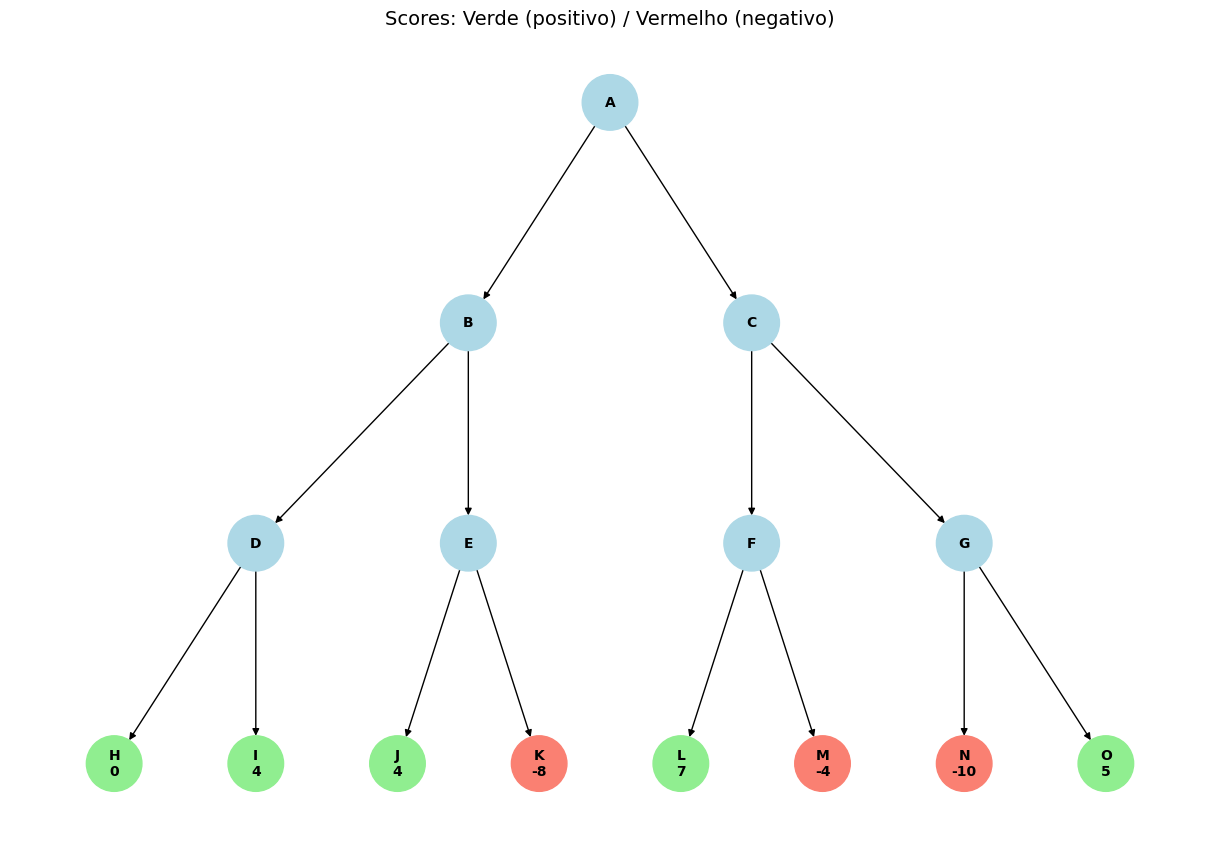

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

edges = [
    (0, 1), (0, 2),
    (1, 3), (1, 4),
    (2, 5), (2, 6),
    (3, 7), (3, 8),
    (4, 9), (4, 10),
    (5, 11), (5, 12),
    (6, 13), (6, 14),
]

# scores das folhas
values = {
    7: 0, 8: 4, 9: 4, 10: -8, 11: 7, 12: -4, 13: -10, 14: 5
}

# adicionando labels A (0) até O (14)
labels = {i: chr(65 + i) for i in range(15)}

# criar grafo
G = nx.DiGraph()
G.add_edges_from(edges)

# atribuir valores
for node in G.nodes:
    G.nodes[node]["value"] = values.get(node, None)

leaf_nodes = [n for n in G.nodes if G.out_degree(n) == 0]

# adicionando cores condicionais
colors = []
for n in G.nodes:
    if n in leaf_nodes:
        val = G.nodes[n]["value"]
        if val is not None and val >= 0:
            colors.append('lightgreen')
        elif val is not None and val < 0:
            colors.append('salmon')
        else:
            colors.append('lightgray')
    else:
        colors.append('lightblue')

# labels com score nas folhas
display_labels = {}
for n in G.nodes:
    if n in leaf_nodes and G.nodes[n]["value"] is not None:
        display_labels[n] = f"{labels[n]}\n{G.nodes[n]['value']}"
    else:
        display_labels[n] = labels[n]

# layout top-down da árvore
pos = graphviz_layout(G, prog="dot")

# plot
plt.figure(figsize=(12, 8))
nx.draw(G, pos,
        with_labels=True,
        labels=display_labels,
        node_color=colors,
        node_size=1600,
        font_weight="bold",
        font_size=10,
        arrows=True)

plt.title("Scores: Verde (positivo) / Vermelho (negativo)", fontsize=14)
plt.axis("off")
plt.show()


## 3.1. Implemente o Minimax (Busca Adversarial) e responda qual o melhor score possível para o Jogador 1 considerando que este é o primeiro a jogar.

In [20]:
# sua resposta

# 4. Considerando o dataset fornecido:

In [21]:
!pip install numpy==1.24.4 scipy==1.10.1

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you ha

In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = list(set(stopwords.words('portuguese')))
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
import pandas as pd

df_train = pd.read_csv("sinopsys_train.csv")
df_test = pd.read_csv("sinopsys_test.csv")

df_train.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sinopsys_train.csv'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Define o corpus a partir da coluna desejada
corpus = df_train["sinopse"].dropna().astype(str).tolist()
corpus[:10]

## 4.1. Crie uma função que implemente um pipeline de préprocessamento apropriado

In [ ]:
# sua resposta

## 4.2. Represente através de uma Bag of Words.

In [ ]:
# sua resposta

## 4.3. Quais os top-10 palavras mais frequentes no corpus que não sejam stopwords?

In [ ]:
# sua resposta

## 4.4. Calcule a similaridade cosseno entre dois documentos à sua escolha e comente o resultado.

In [ ]:
# sua resposta

## 4.5.Implemente o Word2Vec e selecione um contexto presente no corpus (**a seu critério**). Qual palavra o modelo preveu?

In [ ]:
# sua resposta

## 4.6. A abordagem acima foi:

- a) [ ] Skip-gram
- b) [ ] CBOW

In [ ]:
# sua resposta

## 4.7. Duplicar o tamanho do contexto para o caso acima teria impacto positivo ou negativo?

In [ ]:
# sua resposta

## 4.8. Implemente o LDA

In [ ]:
# sua resposta

## 4.9. Selecione um dos Tópicos (**exceto o do exemplo**) e, baseado nos termos, faça uma sugestâo de label que represente bem aquele Tópico.

- **Exemplo**: O Tópico 5 possui predominante termos relacionados a espionagem e guerra. Portanto, um bom label seria Ação e Espionagem Militar.

- Palavras principais deste tópico:
"agente", "guerra", "policial", "mundial", "secreto", "missão", "governo", "investigar", "americano", "eua"

In [ ]:
# sua resposta

A visualização abaixo pode auxiliar na identificação dos tópicos para responder a questão 4.9 - ajuste conforme sua necessidade

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis